In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [9]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("seoul_bike_sharing_demand\\SeoulBikeData.csv").drop(columns=["Date", "Holiday", "Seasons"],axis=1)

In [10]:
df.columns = dataset_cols

In [11]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [12]:
df["functional"] = (df["functional"] == "Yes").astype(int)

In [13]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [16]:
df = df[df["hour"] ==12]
df = df.drop(columns=["hour"], axis=1)

In [17]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


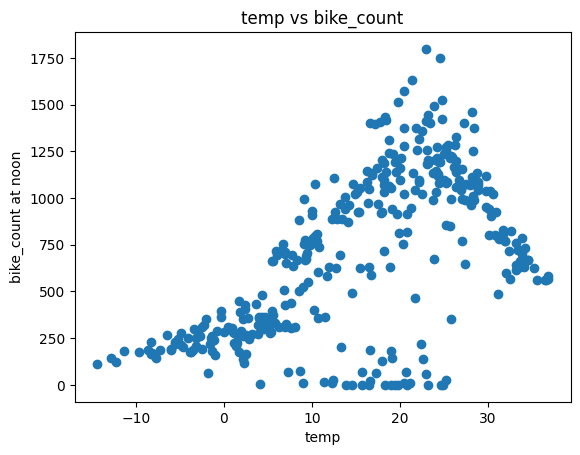

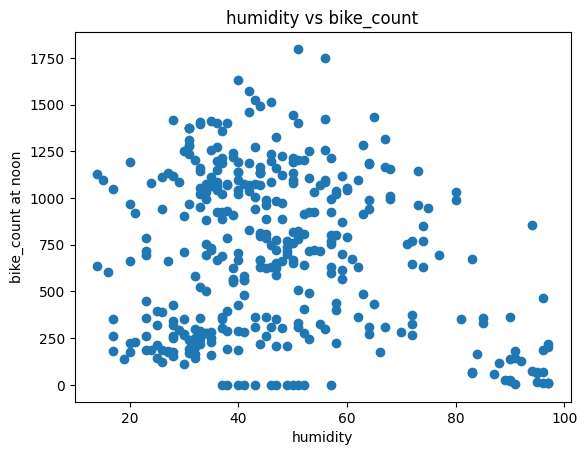

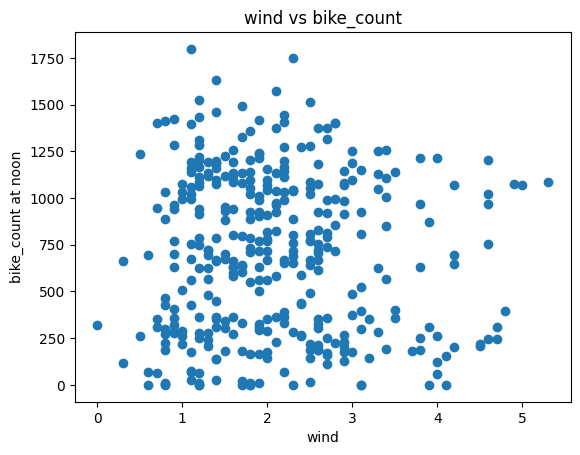

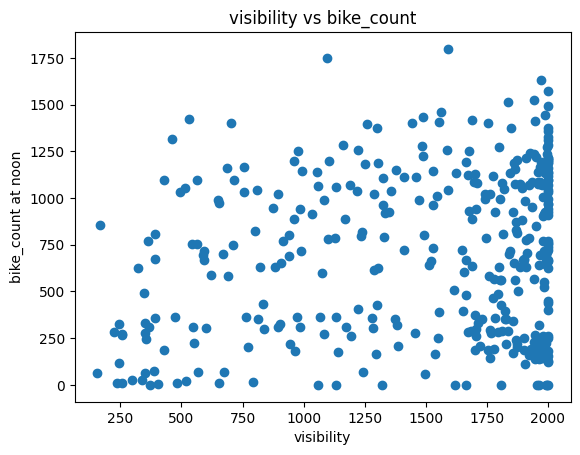

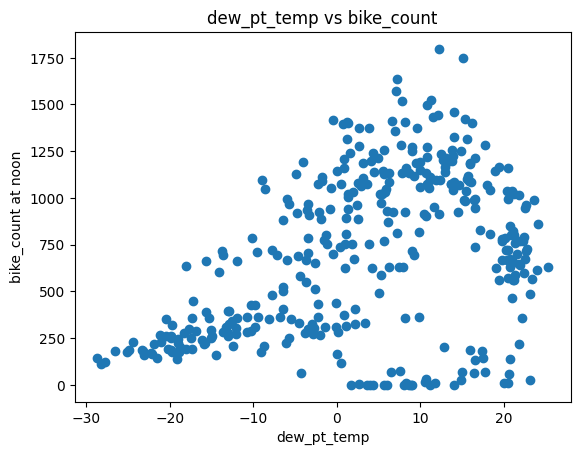

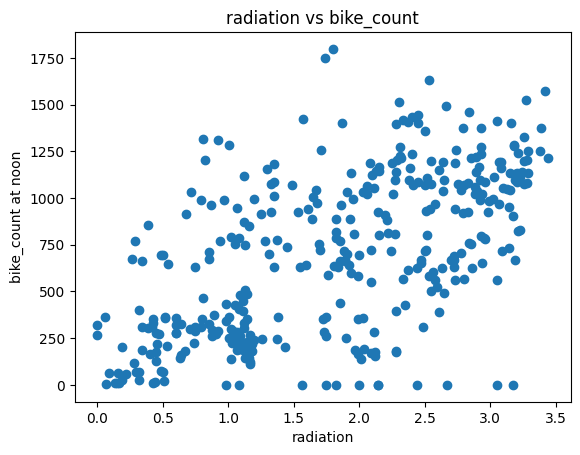

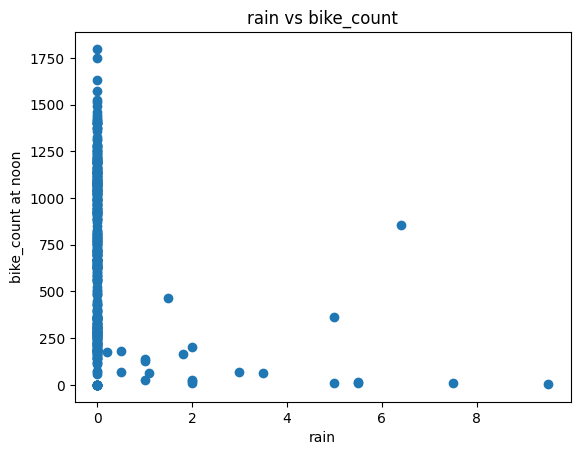

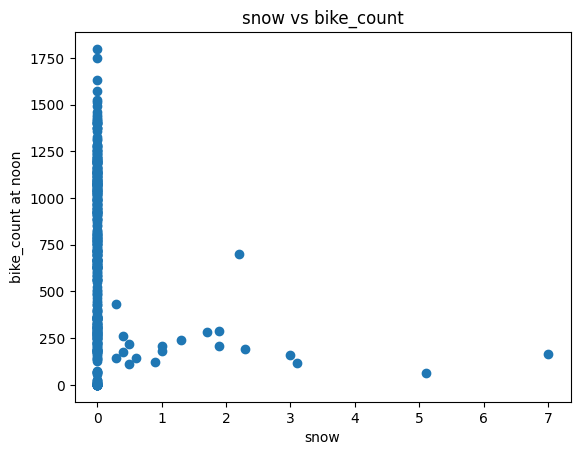

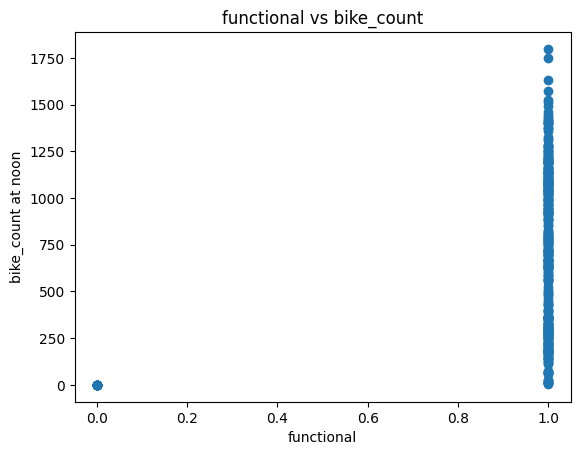

In [18]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(f"{label} vs bike_count")
    plt.ylabel("bike_count at noon")
    plt.xlabel(label)
    plt.show()

In [19]:
df = df.drop(columns=["functional", "wind", "visibility"], axis=1)    

In [20]:
train, val, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

s:\workspace\Youtube\freecodecamp\ML4E\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [33]:
def get_xy(dataframes, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframes)
    if x_labels is None:
        X = dataframes[[c for c in dataframes.columns if c != y_label]]
    else:
        if len(x_labels) == 1:
            X = dataframes[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframes[x_labels].values
    y = dataframes[y_label].values.reshape(-1, 1)
    data = np.hstack((X,y))
    return data, X, y

In [22]:
_, X_train_temp, y_train_temp = get_xy(train,"bike_count",x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val,"bike_count",x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test,"bike_count",x_labels=["temp"])

In [23]:
temp_reg = LinearRegression()
reg_model = temp_reg.fit(X_train_temp,y_train_temp)

In [24]:
print(reg_model.coef_ ,reg_model.intercept_)

[[20.14378561]] [375.72917938]


In [25]:
reg_model.score(X_val_temp, y_val_temp)

0.29092980597149454

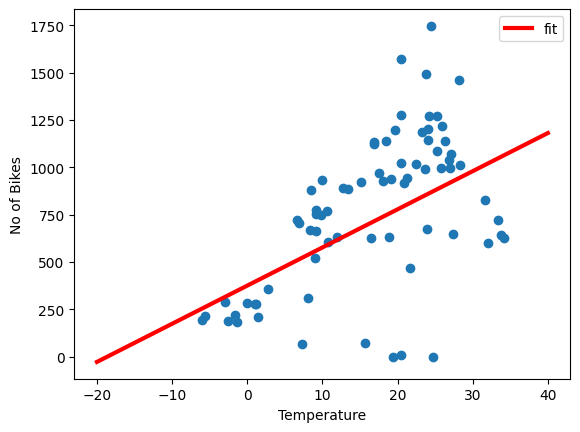

In [31]:
plt.scatter(X_val_temp, y_val_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, reg_model.predict(np.array(x).reshape(-1,1)), color="red",label="fit", linewidth=3)
plt.legend()
plt.ylabel("No of Bikes")
plt.xlabel("Temperature")
plt.show()

Multiple Liner Regression

In [32]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [35]:
train, val, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
_, X_train_all, y_train_all = get_xy(train,"bike_count",x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val,"bike_count",x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test,"bike_count",x_labels=df.columns[1:])

s:\workspace\Youtube\freecodecamp\ML4E\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [36]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [37]:
all_reg.score(X_test_all,y_test_all)

0.5470836015919454

In [ ]:
y_pred_lr = all_reg.predict(X_test_all)

Regression with Neural Network

In [38]:
temp_nomalizer = tf.keras.layers.Normalization(input_shape=[1,],axis=None)
temp_nomalizer.adapt(X_train_temp.reshape(-1))

s:\workspace\Youtube\freecodecamp\ML4E\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
temp_nn_model = tf.keras.Sequential([
    temp_nomalizer,
    tf.keras.layers.Dense(1)
])

temp_nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [43]:
def plot_loss(history):
  
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.grid(True)
  plt.show()

In [40]:
history = temp_nn_model.fit(X_train_temp.reshape(-1), y_train_temp, epochs=1000, verbose=0,validation_data=(X_val_temp,y_val_temp))

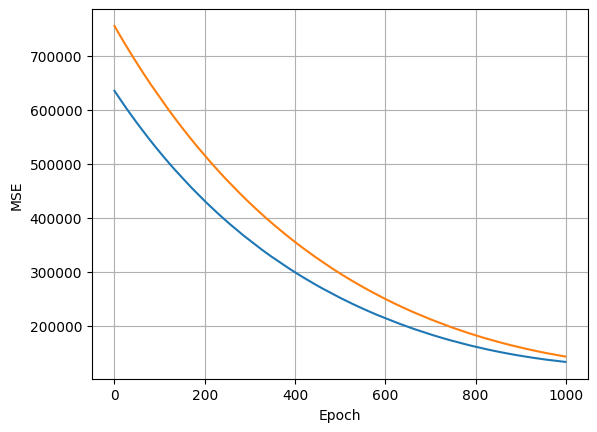

In [44]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


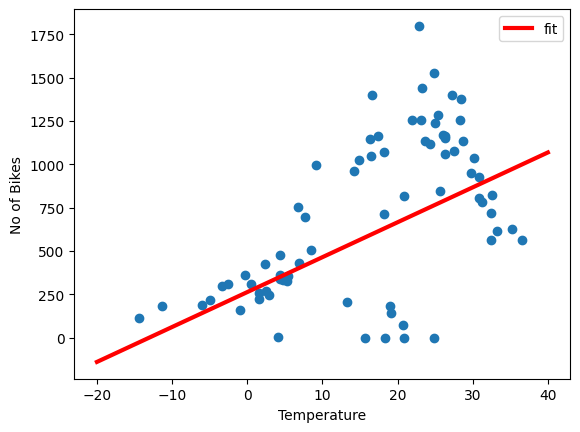

In [46]:
plt.scatter(X_test_temp, y_test_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), color="red",label="fit", linewidth=3)
plt.legend()
plt.ylabel("No of Bikes")
plt.xlabel("Temperature")
plt.show()

In [49]:
temp_nomalizer = tf.keras.layers.Normalization(input_shape=[1,],axis=None)
temp_nomalizer.adapt(X_train_temp.reshape(-1))

s:\workspace\Youtube\freecodecamp\ML4E\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
nn_model = tf.keras.Sequential([
    temp_nomalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [58]:
history = nn_model.fit(X_train_temp, y_train_temp, epochs=100, verbose=0,validation_data=(X_val_temp,y_val_temp))

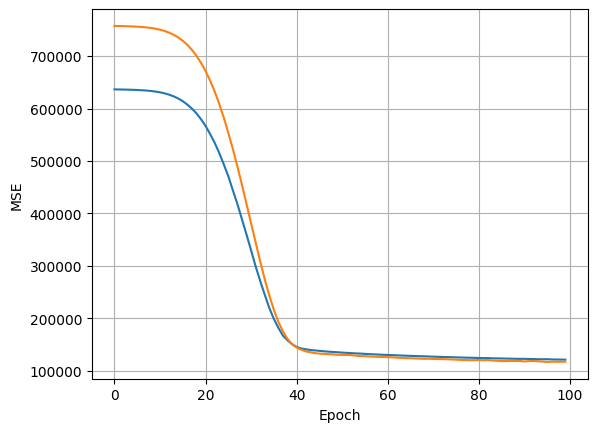

In [59]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


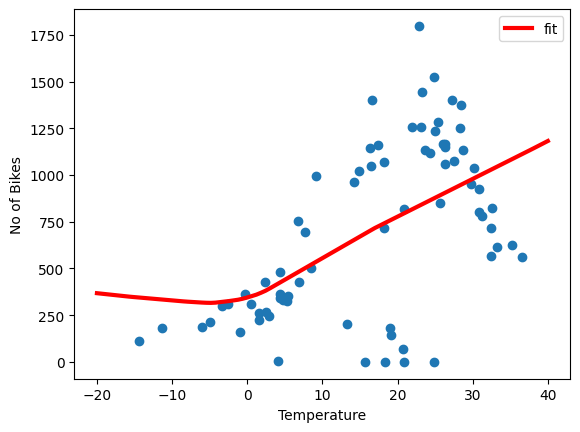

In [61]:
plt.scatter(X_test_temp, y_test_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), color="red",label="fit", linewidth=3)
plt.legend()
plt.ylabel("No of Bikes")
plt.xlabel("Temperature")
plt.show()

In [73]:
all_nomalizer = tf.keras.layers.Normalization(input_shape=[6],axis=None)
all_nomalizer.adapt(X_train_all)

s:\workspace\Youtube\freecodecamp\ML4E\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
all_nn_model = tf.keras.Sequential([
    all_nomalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    
    tf.keras.layers.Dense(1),
])

all_nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [75]:
history = all_nn_model.fit(X_train_all, y_train_all, epochs=100, verbose=0,validation_data=(X_val_all,y_val_all))

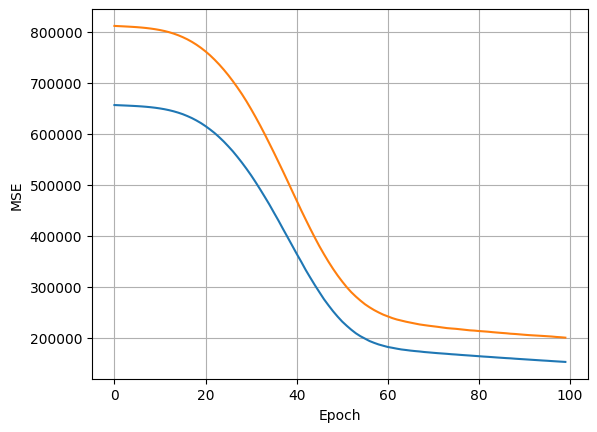

In [76]:
plot_loss(history)

In [77]:
#calculate the MSE
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = all_nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [78]:
def MSE(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [79]:
print(f"Linear Regression MSE: {MSE(y_test_all, y_pred_lr)}")

Linear Regression MSE: 93801.52019837998


In [80]:
print(f"Neural Network MSE: {MSE(y_test_all, y_pred_nn)}")

Neural Network MSE: 209486.19857941446


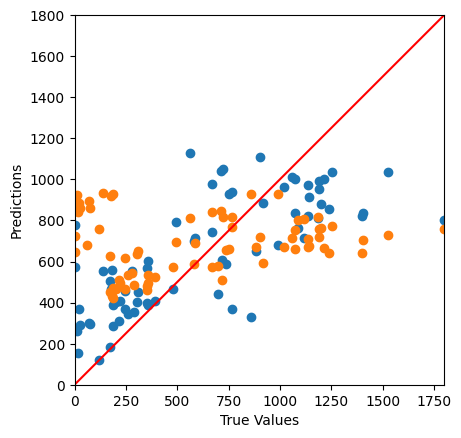

In [84]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr,label="Linear Regression Pred")
plt.scatter(y_test_all, y_pred_nn,label="NN Pred")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color="red")